In [197]:
import numpy as np
import scipy.integrate as scint
import matplotlib.pyplot as plt

plt.close('all')

In [198]:
"""
==============================================================================
Parameters (all units SI)
==============================================================================
"""

# dispersion
k2 = -20e-27
# nonlinearity
gamma = 1e-3
# length
L = 3

# temporal span of co-moving time grid
tau_span = 2e-12
# number of discretization points
ntau = 2**12
# discretized tau axis
tau_span = 10e-12
tau = np.linspace(-tau_span/2, tau_span/2, ntau)
# tau-sampling interval (equidistant)
dtau = tau_span/(ntau-1)


In [199]:
#########################################
# Initial field envelope
#########################################

#pulse 1
tau0 = 0.1e-12
freq_offset = -np.pi*10e12 #2*np.pi*10e12
tau_offset = -0.5e-12
a0 = np.sqrt(-k2/gamma/tau0**2)
a_init = a0/np.cosh((tau-tau_offset)/tau0) * np.exp(-1j*freq_offset*tau) 

#pulse 2
tau0 = 0.1e-12
freq_offset = -3*np.pi*10e12
tau_offset = -1.5e-12
a0 = np.sqrt(-k2/gamma/tau0**2)

a_init += a0/np.cosh((tau-tau_offset)/tau0) * np.exp(-1j*freq_offset*tau)

In [200]:
# number of point along the propagation direction where the result is saved
nz = 1000
# z values where the result is saved and array to store results
z_save = np.linspace(0, L, nz)
a_save = np.zeros((nz, ntau), complex)

In [201]:

"""
==============================================================================
Define the NLSE and setup ODE solver
==============================================================================
"""

def NLSE(z, a):

    # This function return the RHS ofthe NLSE according to:
    # d/dz a = -i/2 k_2 (d/dtau)^2 a + i gamma |a|^2 a 
    # d/dz does not depend on z, so the variable z is not used here 
    # (but z is required for formal reasons to interface with the solver )
    
    # linear evolution (dispersion)
    da_dtau = np.gradient(a, dtau)
    d2a_dtau2 = np.gradient(da_dtau, dtau)
    da_dz_L = -1j*0.5*k2*d2a_dtau2
    
    # nonlinear evolution
    da_dz_NL = 1j*gamma*a*np.conj(a)*a
    
    # combined linear and nonlinear evolution    
    da_dz = da_dz_L + da_dz_NL

    return da_dz




solver = scint.complex_ode(NLSE)
solver.set_integrator('dopri5', rtol = 1e-19)
solver.set_initial_value(a_init)


In [202]:
"""
==============================================================================
Run numeric ODE solver 
==============================================================================
"""

for z_idx, z in enumerate (z_save):
    solver.integrate(z)
    a_save[z_idx] = solver.y
 
    done = 100*(z_idx+1) / nz
    print(str(int(done)) + '% done.')


0% done.
0% done.
0% done.
0% done.
0% done.
0% done.
0% done.
0% done.
0% done.
1% done.
1% done.
1% done.
1% done.
1% done.
1% done.
1% done.
1% done.
1% done.
1% done.
2% done.
2% done.
2% done.
2% done.
2% done.
2% done.
2% done.
2% done.
2% done.
2% done.
3% done.
3% done.
3% done.
3% done.
3% done.
3% done.
3% done.
3% done.
3% done.
3% done.
4% done.
4% done.
4% done.
4% done.
4% done.
4% done.
4% done.
4% done.
4% done.
4% done.
5% done.
5% done.
5% done.
5% done.
5% done.
5% done.
5% done.
5% done.
5% done.
5% done.
6% done.
6% done.
6% done.
6% done.
6% done.
6% done.
6% done.
6% done.
6% done.
6% done.
7% done.
7% done.
7% done.
7% done.
7% done.
7% done.
7% done.
7% done.
7% done.
7% done.
8% done.
8% done.
8% done.
8% done.
8% done.
8% done.
8% done.
8% done.
8% done.
8% done.
9% done.
9% done.
9% done.
9% done.
9% done.
9% done.
9% done.
9% done.
9% done.
9% done.
10% done.
10% done.
10% done.
10% done.
10% done.
10% done.
10% done.
10% done.
10% done.
10% done.
11% done.

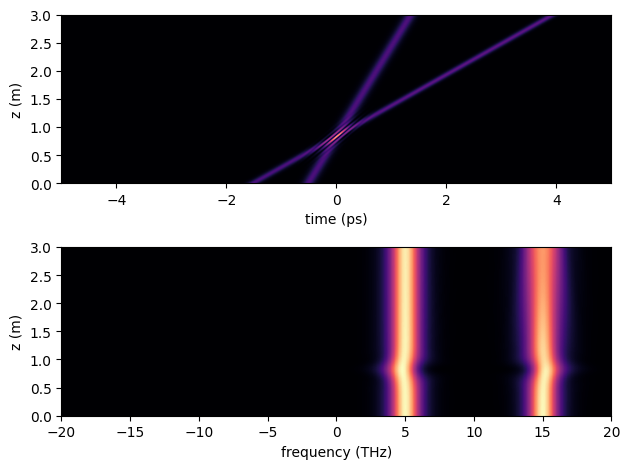

In [203]:
def spec(a):
    
    spec = np.zeros((nz, ntau), complex)
    for z_index in range(nz):  
        spec[z_index] = np.fft.fftshift(np.fft.fft(a_save[z_index]))    

    return spec  

spectrum = spec(a_save)

plt.close('all')
plt.figure()
plt.subplot(2,1,1)
extent = (-1e12*tau_span/2, 1e12*tau_span/2, np.min(z_save), np.max(z_save))
plt.imshow(np.abs(a_save)**2, extent=extent, aspect='auto', origin='lower', cmap='magma')  
plt.xlabel('time (ps)')
plt.ylabel('z (m)')
plt.xlim(-5, 5)
plt.subplot(2,1,2)
extent = (-1e-12/dtau/2, 1e-12/dtau/2, np.min(z_save), np.max(z_save))
plt.imshow(np.abs(spectrum)**2, extent=extent, aspect='auto', origin='lower', cmap='magma')  
plt.xlabel('frequency (THz)')
plt.ylabel('z (m)')
plt.xlim(-20,20)

plt.tight_layout()